In [37]:
import pandas as pd

In [374]:
df = pd.read_csv('all_data_not_advanced.csv', sep=',')

In [375]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [317]:
pd.set_option('display.max_columns', 200)
#df1 = df.drop(['Name','name','result','index','year_x','year_y','winner'], axis=1)
df1 = df.drop(['name','index','year_x','winner'], axis=1)

In [318]:
pd.set_option('display.max_row', 200)


In [319]:
df1 = df1.drop(['Name','year_y','result'], axis=1)

In [320]:
blah=split_all_data_up (df,df1['point_difference'])
df1['round']=blah
df1=df1[(df1['round']==2)]

In [321]:
df1=df1[(df1['team_seed']== 1) | (df1['team_seed']== 8)]

In [378]:
df1 = df1.drop(['round'], axis = 1)

KeyError: "['round' 'name' 'index' 'year_x' 'winner'] not found in axis"

In [302]:
df1['point_difference'].unique()

array([15,  1,  7,  3,  8,  4,  6, 11,  2,  0,  5, 10,  9, 12])

# Gets the opponent data

In [3]:
df1 = pd.read_csv('1993_2019.csv', sep=',')

In [4]:
df1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'winner', 'point_difference', 'result',
       'name_x', 'team_seed', 'win', 'higher_or_lower_seed', 'index', 'year_x',
       'Name', 'BLKPG', 'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm',
       '_2pa', '_2p_perc', 'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'year_y',
       'ORPG', 'DRPG', 'RPG', 'other_team_seed', 'names_for_merging_sr',
       'index_everything', 'name_y', 'SRS_adv', 'SOS_adv', 'eFG_perc_adv',
       'year_adv', 'SRS_adv_opponent', 'SOS_adv_opponent',
       'eFG_perc_adv_opponent', 'SRS_adv_subtracted', 'SOS_adv_subtracted',
       'eFG_perc_adv_subtracted'],
      dtype='object')

In [5]:
#pass through the dataframe you want to add to and the column name
#it will create a new column with the columnname_opponent
def get_opponent_data (df, column_name):
    first_data = []
    second_data = []
    i=0
    x = 0
    for thing in df[f'{column_name}']:
        if i ==0:
            first_data.append(df[f'{column_name}'].iloc[x+1])
            i+=1
            x+=1
        elif i==1:
            second_data.append(df[f'{column_name}'].iloc[x-1])
            i=0
            x+=1
    
    i=0
    x=0
    opponent_data = []
    for thing in first_data+second_data:
        if i==0:
            opponent_data.append(first_data[x])
            i+=1
        elif i==1:
            opponent_data.append(second_data[x])
            x+=1
            i=0
    print('made it here')        
    df[f'{column_name}'+'_opponent']=opponent_data


In [470]:
get_opponent_data (df1, 'PTS')

made it here


In [6]:
opponent_columns = ['BLKPG',
       'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc',
       'FG_perc', '_3p_perc', 'FT_perc', 'ORPG', 'DRPG', 'RPG',
       'other_team_seed']

In [14]:
opponent_columns = ['PTS']

In [15]:
for column in opponent_columns:
    get_opponent_data (df1, f'{column}')

made it here


In [9]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
df1

,Unnamed: 0,Unnamed: 0.1,winner,point_difference,result,name_x,team_seed,win,higher_or_lower_seed,index,year_x,Name,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,year_y,ORPG,DRPG,RPG,other_team_seed,names_for_merging_sr,index_everything,name_y,SRS_adv,SOS_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,eFG_perc_adv_subtracted,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,other_team_seed_opponent
0,0,1008,1,15,1,UNC,1,1,1,0,1993,North Carolina,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,70.6,0.413,0.291,0.663,1993,13.9,28.7,42.6,16,North Carolina,0,North Carolina,29.04,11.25,0.541,1993,-2.02,0.95,0.465,31.06,10.30,0.076,3.25,6.75,14.0,1.02,5.4,19.0,512.0,1055.0,0.485,0.417,0.284,0.725,9.8,26.1,35.9,1
1,1,1009,1,15,1,East Carolina,16,0,0,1,1993,East Carolina,3.25,6.75,14.0,1.02,5.4,19.0,512.0,1055.0,0.485,68.5,0.417,0.284,0.725,1993,9.8,26.1,35.9,1,East Carolina,1,East Carolina,-2.02,0.95,0.465,1993,29.04,11.25,0.541,-31.06,-10.30,-0.076,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,0.413,0.291,0.663,13.9,28.7,42.6,16
2,2,1010,8,1,1,Rhode Island,8,1,1,2,1993,Rhode Island,4.00,8.73,12.7,1.05,5.7,18.0,544.0,1159.0,0.469,74.7,0.428,0.323,0.692,1993,12.1,27.3,39.4,9,Rhode Island,2,Rhode Island,9.50,6.40,0.484,1993,12.96,9.63,0.519,-3.46,-3.23,-0.035,3.43,6.46,13.5,1.18,7.4,22.0,506.0,1077.0,0.470,0.424,0.342,0.670,12.5,23.9,36.4,8
3,3,1011,8,1,1,Purdue,9,0,0,3,1993,Purdue,3.43,6.46,13.5,1.18,7.4,22.0,506.0,1077.0,0.470,68.3,0.424,0.342,0.670,1993,12.5,23.9,36.4,8,Purdue,3,Purdue,12.96,9.63,0.519,1993,9.50,6.40,0.484,3.46,3.23,0.035,4.00,8.73,12.7,1.05,5.7,18.0,544.0,1159.0,0.469,0.428,0.323,0.692,12.1,27.3,39.4,9
4,4,1012,5,7,1,St. John's (NY),5,1,1,4,1993,St. John's,4.22,10.15,14.6,1.24,6.4,21.0,559.0,1235.0,0.453,74.7,0.407,0.307,0.711,1993,13.0,26.5,39.4,12,St. John's (NY),4,St. John's (NY),13.16,9.49,0.504,1993,2.91,1.56,0.530,10.25,7.93,-0.026,4.11,8.00,15.8,1.15,7.3,20.0,492.0,950.0,0.518,0.461,0.361,0.754,9.0,24.7,33.7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,3350,4405,1,4,1,Auburn,5,0,0,121,2019,Auburn,4.79,9.29,14.4,1.18,11.2,30.0,549.0,1059.0,0.518,79.4,0.449,0.376,0.710,2019,12.0,22.4,34.5,1,Auburn,3397,Auburn,20.84,10.92,0.543,2019,25.46,10.15,0.552,-4.62,0.77,-0.009,3.81,5.63,14.5,1.61,8.5,21.0,549.0,1052.0,0.522,0.478,0.409,0.746,8.9,25.8,34.6,5
3398,3329,4406,3,1,2,Texas Tech,3,1,0,122,2019,Texas Tech,4.91,7.38,14.0,1.13,7.3,20.0,605.0,1144.0,0.529,73.1,0.472,0.368,0.728,2019,8.8,25.4,34.3,2,Texas Tech,3398,Texas Tech,22.79,9.53,0.535,2019,24.93,12.34,0.552,-2.14,-2.81,-0.017,5.45,5.33,19.1,1.47,8.3,22.0,649.0,1177.0,0.551,0.488,0.383,0.750,10.8,30.2,41.0,3
3399,3305,4407,3,1,2,Michigan State,2,0,1,123,2019,Michigan State,5.45,5.33,19.1,1.47,8.3,22.0,649.0,1177.0,0.551,79.2,0.488,0.383,0.750,2019,10.8,30.2,41.0,3,Michigan State,3399,Michigan State,24.93,12.34,0.552,2019,22.79,9.53,0.535,2.14,2.81,0.017,4.91,7.38,14.0,1.13,7.3,20.0,605.0,1144.0,0.529,0.472,0.368,0.728,8.8,25.4,34.3,2
3400,3375,4408,1,2,1,Virginia,1,1,1,124,2019,Virginia,3.81,5.63,14.5,1.61,8.5,21.0,549.0,1052.0,0.522,71.8,0.478,0.409,0.746,2019,8.9,25.8,34.6,3,Virginia,3400,Virginia,25.46,10.15,0.552,2019,22.79,9.53,0.535,2.67,0.62,0.017,4.91,7.38,14.0,1.13,7.3,20.0,605.0,1144.0,0.529,0.472,0.368,0.728,8.8,25.4,34.3,1


In [10]:
def subtracted_stats  (df,column):
    i = 0
    subtracted = []
    for thing in list(df[f'{column}']):
        difference=list(df[f'{column}'])[i]-list(df[f'{column}'+'_opponent'])[i]
        subtracted.append(difference)
        i+=1
    
    df[f'{column}'+'_subtracted']=subtracted

In [11]:
columns = ['BLKPG',
       'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc',
       'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'ORPG', 'DRPG', 'RPG']

In [13]:
df1.columns


Index(['Unnamed: 0', 'Unnamed: 0.1', 'winner', 'point_difference', 'result',
       'name_x', 'team_seed', 'win', 'higher_or_lower_seed', 'index', 'year_x',
       'Name', 'BLKPG', 'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm',
       '_2pa', '_2p_perc', 'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'year_y',
       'ORPG', 'DRPG', 'RPG', 'other_team_seed', 'names_for_merging_sr',
       'index_everything', 'name_y', 'SRS_adv', 'SOS_adv', 'eFG_perc_adv',
       'year_adv', 'SRS_adv_opponent', 'SOS_adv_opponent',
       'eFG_perc_adv_opponent', 'SRS_adv_subtracted', 'SOS_adv_subtracted',
       'eFG_perc_adv_subtracted', 'BLKPG_opponent', 'STPG_opponent',
       'APG_opponent', 'AST_TO_opponent', '_3pm_opponent', '_3pa_opponent',
       '_2pm_opponent', '_2pa_opponent', '_2p_perc_opponent',
       'FG_perc_opponent', '_3p_perc_opponent', 'FT_perc_opponent',
       'ORPG_opponent', 'DRPG_opponent', 'RPG_opponent',
       'other_team_seed_opponent', 'BLKPG_subtracted', 'STPG_subtracted',
   

In [16]:
for thing in columns:
    subtracted_stats(df1,thing)

In [17]:
df1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'winner', 'point_difference', 'result',
       'name_x', 'team_seed', 'win', 'higher_or_lower_seed', 'index', 'year_x',
       'Name', 'BLKPG', 'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm',
       '_2pa', '_2p_perc', 'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'year_y',
       'ORPG', 'DRPG', 'RPG', 'other_team_seed', 'names_for_merging_sr',
       'index_everything', 'name_y', 'SRS_adv', 'SOS_adv', 'eFG_perc_adv',
       'year_adv', 'SRS_adv_opponent', 'SOS_adv_opponent',
       'eFG_perc_adv_opponent', 'SRS_adv_subtracted', 'SOS_adv_subtracted',
       'eFG_perc_adv_subtracted', 'BLKPG_opponent', 'STPG_opponent',
       'APG_opponent', 'AST_TO_opponent', '_3pm_opponent', '_3pa_opponent',
       '_2pm_opponent', '_2pa_opponent', '_2p_perc_opponent',
       'FG_perc_opponent', '_3p_perc_opponent', 'FT_perc_opponent',
       'ORPG_opponent', 'DRPG_opponent', 'RPG_opponent',
       'other_team_seed_opponent', 'BLKPG_subtracted', 'STPG_subtracted',
   

# Decision Tree

In [556]:
X = df1.drop('win',axis=1)
#could have also done answers1.set_index('SEQN') instead of dropping
y = df1['win']

In [557]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [558]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 123)


In [559]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [560]:
predictions = dtree.predict(X_test)


In [561]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.62      0.67      0.64       625
           1       0.67      0.62      0.64       685
        9999       1.00      1.00      1.00        13

    accuracy                           0.65      1323
   macro avg       0.76      0.76      0.76      1323
weighted avg       0.65      0.65      0.65      1323



In [562]:
from sklearn import metrics
metrics.accuracy_score(y_test, predictions)


0.6455026455026455

In [495]:

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X_train.columns)
len(features)

54

In [496]:
df1.columns

Index(['point_difference', 'team_seed', 'win', 'higher_or_lower_seed', 'BLKPG',
       'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc',
       'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'ORPG', 'DRPG', 'RPG',
       'other_team_seed', 'round', 'PTS_opponent', 'BLKPG_opponent',
       'STPG_opponent', 'APG_opponent', 'AST_TO_opponent', '_3pm_opponent',
       '_3pa_opponent', '_2pm_opponent', '_2pa_opponent', '_2p_perc_opponent',
       'FG_perc_opponent', '_3p_perc_opponent', 'FT_perc_opponent',
       'ORPG_opponent', 'DRPG_opponent', 'RPG_opponent',
       'other_team_seed_opponent', 'BLKPG_subtracted', 'STPG_subtracted',
       'APG_subtracted', 'AST_TO_subtracted', '_3pm_subtracted',
       '_3pa_subtracted', '_2pm_subtracted', '_2pa_subtracted',
       '_2p_perc_subtracted', 'PTS_subtracted', 'FG_perc_subtracted',
       '_3p_perc_subtracted', 'FT_perc_subtracted', 'ORPG_subtracted',
       'DRPG_subtracted', 'RPG_subtracted'],
      dtype='object')

In [618]:
#function for accuracy in decision tree
def get_predictions (df1,point_diff):
    #df = pd.read_csv('all_data_not_advanced.csv', sep=',')
    #df.drop(['Unnamed: 0'], axis=1, inplace = True)
    #pd.set_option('display.max_columns', 200)
    #df1 = df.drop(['Name','name','result','index','year_x','year_y','winner'], axis=1)
    #df1 = df.drop(['name','index','year_x','winner'], axis=1)
    #pd.set_option('display.max_row', 200)
    #df1 = df1.drop(['Name','year_y','result'], axis=1)
    #blah=split_all_data_up (df,df1['point_difference'])
    #df1['round']=blah
    #unhashtag this if you want the ESPN stuff also
    #df1=df1[['point_difference','team_seed','win','higher_or_lower_seed','other_team_seed','round']]
    #unhashtag the row below if you want to look at a specific round
    #df1=df1[(df1['round']==3)]
    df1=df1[(df1['point_difference']== point_diff)]
    #df1 = df1.drop(['round'], axis = 1)
    X = df1.drop('win',axis=1)
    #could have also done answers1.set_index('SEQN') instead of dropping
    y = df1['win']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train,y_train)
    predictions = dtree.predict(X_test)
    #print(classification_report(y_test,predictions))

    return metrics.accuracy_score(y_test, predictions)


In [611]:
adv_stats_and_seed_stuff.columns

Index(['round', 'point_difference', 'team_seed', 'win', 'higher_or_lower_seed',
       'other_team_seed', 'SRS_adv_subtracted', 'SOS_adv_subtracted',
       'pace_adv_subtracted', 'ORtg_adv_subtracted',
       'eFG_perc_adv_subtracted'],
      dtype='object')

In [619]:
predictions = {}
for num in possible_point_differences:
    try:
        predictions[f'{num}']=get_predictions (adv_stats_and_seed_stuff,num)
    except:
        continue

In [620]:
predictions

{'15': 1.0,
 '1': 0.6785714285714286,
 '7': 0.5833333333333334,
 '3': 0.6382978723404256,
 '8': 0.5384615384615384,
 '4': 0.5882352941176471,
 '6': 0.4,
 '11': 0.8333333333333334,
 '2': 0.5,
 '0': 1.0,
 '5': 0.5263157894736842,
 '10': 0.5,
 '9': 0.8148148148148148,
 '12': 1.0}

In [429]:
fourth_round_pred_no_stats = predictions

In [436]:
#with stats
predictions

{'15': 0.9761904761904762,
 '1': 0.5067873303167421,
 '7': 0.5294117647058824,
 '3': 0.536723163841808,
 '8': 0.6326530612244898,
 '4': 0.4788732394366197,
 '6': 0.6363636363636364,
 '11': 0.7604166666666666,
 '2': 0.5806451612903226,
 '0': 1.0,
 '5': 0.54421768707483,
 '10': 0.6,
 '9': 0.6428571428571429,
 '12': 1.0}

In [433]:
#no stats
predictions

{'15': 1.0,
 '1': 0.5158371040723982,
 '7': 0.7058823529411765,
 '3': 0.655367231638418,
 '8': 0.7551020408163265,
 '4': 0.7183098591549296,
 '6': 0.5454545454545454,
 '11': 0.84375,
 '2': 0.5806451612903226,
 '0': 1.0,
 '5': 0.6462585034013606,
 '10': 0.4,
 '9': 0.7448979591836735,
 '12': 1.0}

In [414]:
All_pred_no_stats

{'15': 1.0,
 '1': 0.5203619909502263,
 '7': 0.6838235294117647,
 '3': 0.6214689265536724,
 '8': 0.7619047619047619,
 '4': 0.7323943661971831,
 '6': 0.7272727272727273,
 '11': 0.8541666666666666,
 '2': 0.45161290322580644,
 '0': 1.0,
 '5': 0.673469387755102,
 '10': 0.2,
 '9': 0.7857142857142857,
 '12': 1.0}

In [418]:
first_round_pred_no_stats

{'15': 0.9880952380952381,
 '1': 0.42857142857142855,
 '7': 0.5833333333333334,
 '3': 0.5476190476190477,
 '11': 0.8690476190476191,
 '5': 0.6428571428571429,
 '9': 0.7142857142857143}

In [366]:
first_round_pred = predictions

In [367]:
first_round_pred

{'15': 0.9880952380952381,
 '1': 0.5238095238095238,
 '7': 0.6785714285714286,
 '3': 0.44047619047619047,
 '11': 0.6904761904761905,
 '5': 0.5119047619047619,
 '9': 0.6309523809523809}

In [422]:
second_round_pred_no_stats

{'1': 0.5294117647058824,
 '7': 0.8095238095238095,
 '3': 0.7021276595744681,
 '8': 0.7602739726027398,
 '5': 0.6792452830188679}

In [359]:
second_round_pred

{'1': 0.5686274509803921,
 '7': 0.6190476190476191,
 '3': 0.574468085106383,
 '8': 0.589041095890411,
 '5': 0.5849056603773585}

In [426]:
third_round_pred_no_stats

{'1': 0.5757575757575758,
 '7': 0.5555555555555556,
 '3': 0.7352941176470589,
 '4': 0.6716417910447762,
 '11': 1.0,
 '5': 0.6666666666666666,
 '9': 0.7777777777777778,
 '12': 1.0}

In [360]:
third_round_pred

{'1': 0.45454545454545453,
 '7': 0.4444444444444444,
 '3': 0.5588235294117647,
 '4': 0.5223880597014925,
 '11': 1.0,
 '5': 0.3333333333333333,
 '9': 0.6666666666666666,
 '12': 1.0}

In [430]:
fourth_round_pred_no_stats

{'1': 0.3939393939393939,
 '7': 0.0,
 '3': 0.5,
 '6': 0.875,
 '2': 0.4583333333333333,
 '5': 0.8571428571428571,
 '10': 0.4,
 '9': 1.0}

In [361]:
fourth_round_pred

{'1': 0.45454545454545453,
 '7': 0.0,
 '3': 0.5,
 '6': 1.0,
 '2': 0.2916666666666667,
 '5': 0.5714285714285714,
 '10': 0.2,
 '9': 0.3333333333333333}

In [362]:
fifth_round_pred

{'1': 0.5833333333333334,
 '7': 0.0,
 '3': 0.6666666666666666,
 '8': 1.0,
 '4': 0.3333333333333333,
 '6': 0.3333333333333333,
 '2': 0.6666666666666666,
 '0': 1.0,
 '9': 0.5}

In [363]:
sixth_round_pred

{'1': 0.4444444444444444,
 '7': 0.0,
 '3': 0.0,
 '4': 1.0,
 '2': 0.5,
 '0': 1.0,
 '5': 0.5}

In [308]:
All_rounds_predictions

{'15': 1.0,
 '1': 0.5067873303167421,
 '7': 0.5882352941176471,
 '3': 0.5141242937853108,
 '8': 0.6394557823129252,
 '4': 0.5915492957746479,
 '6': 0.6363636363636364,
 '11': 0.7916666666666666,
 '2': 0.3870967741935484,
 '0': 1.0,
 '5': 0.5238095238095238,
 '10': 0.8,
 '9': 0.7142857142857143,
 '12': 1.0}

In [337]:
possible_point_differences=[15,  1,  7,  3,  8,  4,  6, 11,  2,  0,  5, 10,  9, 12]

In [39]:
import seaborn as sns
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [517]:
x = [1,2,3,4]
y = [1,2,3,4]
z = [2,3,4,5]

Text(0.5, 1.0, 'add title here')

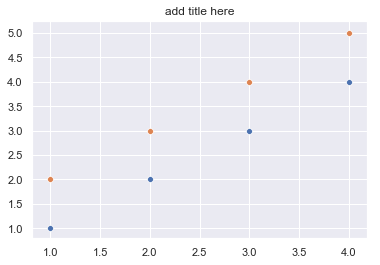

In [523]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x, y)
ax = sns.scatterplot(x, z)
ax.set_title('lalala')

In [519]:
df1.columns

Index(['point_difference', 'team_seed', 'win', 'higher_or_lower_seed', 'BLKPG',
       'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc',
       'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'ORPG', 'DRPG', 'RPG',
       'other_team_seed', 'round', 'PTS_opponent', 'BLKPG_opponent',
       'STPG_opponent', 'APG_opponent', 'AST_TO_opponent', '_3pm_opponent',
       '_3pa_opponent', '_2pm_opponent', '_2pa_opponent', '_2p_perc_opponent',
       'FG_perc_opponent', '_3p_perc_opponent', 'FT_perc_opponent',
       'ORPG_opponent', 'DRPG_opponent', 'RPG_opponent',
       'other_team_seed_opponent', 'BLKPG_subtracted', 'STPG_subtracted',
       'APG_subtracted', 'AST_TO_subtracted', '_3pm_subtracted',
       '_3pa_subtracted', '_2pm_subtracted', '_2pa_subtracted',
       '_2p_perc_subtracted', 'PTS_subtracted', 'FG_perc_subtracted',
       '_3p_perc_subtracted', 'FT_perc_subtracted', 'ORPG_subtracted',
       'DRPG_subtracted', 'RPG_subtracted'],
      dtype='object')

In [550]:
def make_graph (df1,column):
    wins=df1[(df1['win']==1)]
    losses=df1[(df1['win']==0)]
    
    wins = wins.sort_values(by =f'{column}' )
    losses = losses.sort_values(by =f'{column}' )
    
    wins = wins.sort_values(by =f'{column}')
    wins = wins.sort_values(by =f'{column}')
    
    i=0
    index_=[]
    for thing in wins[f'{column}']:
        index_.append(i)
        i+=1
    wins['index_']=index_
    
    i=0
    index_1=[]
    for thing in losses[f'{column}']:
        index_1.append(i)
        i+=1
    losses['index_']=index_1
        
    

    ax = sns.scatterplot(list(wins['index_']),list(wins[f'{column}']))
    ax = sns.scatterplot(list(losses['index_']),list(losses[f'{column}']))
    ax.set_title(f'{column}')
    return ax



    

In [40]:
def make_graph (df1,column):
    wins=df1[(df1['win']==1)]
    losses=df1[(df1['win']==0)]
    
    wins = wins.sort_values(by =f'{column}' )
    losses = losses.sort_values(by =f'{column}' )
    
    wins = wins.sort_values(by =f'{column}')
    wins = wins.sort_values(by =f'{column}')
    
    i=0
    index_=[]
    for thing in wins[f'{column}']:
        index_.append(i)
        i+=1
    wins['index_']=index_
    
    i=0
    index_1=[]
    for thing in losses[f'{column}']:
        index_1.append(i)
        i+=1
    losses['index_']=index_1
        
    

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(list(wins['index_']),list(wins[f'{column}']), s=10, c='b', marker="s", label='first')
    ax1.scatter(list(losses['index_']),list(losses[f'{column}']), s=10, c='r', marker="o", label='second')
    plt.title(f'{column}')
    plt.legend(loc=f'{column}');
    plt.show()

In [31]:
merged_df = pd.read_csv('2002_2019_EVERYTHING.csv', sep=',')

In [32]:
merged_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'winner', 'point_difference', 'result', 'name_x',
       'team_seed', 'win', 'higher_or_lower_seed', 'index', 'year_x', 'Name',
       'BLKPG', 'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa',
       '_2p_perc', 'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'year_y', 'ORPG',
       'DRPG', 'RPG', 'other_team_seed', 'names_for_merging_sr',
       'index_everything', 'name_y', 'SRS_adv', 'SOS_adv', 'eFG_perc_adv',
       'year_adv', 'SRS_adv_opponent', 'SOS_adv_opponent',
       'eFG_perc_adv_opponent', 'SRS_adv_subtracted', 'SOS_adv_subtracted',
       'eFG_perc_adv_subtracted', 'BLKPG_opponent', 'STPG_opponent',
       'APG_opponent', 'AST_TO_opponent', '_3pm_opponent', '_3pa_opponent',
       '_2pm_opponent', '_2pa_opponent', '_2p_perc_opponent',
       'FG_perc_opponent', '_3p_perc_opponent', 'FT_perc_opponent',
       'ORPG_opponent', 'DRPG_opponent', 'RPG_opponent',
       'ot

In [587]:
merged_df['round']

KeyError: 'round'

In [609]:
adv_stats_and_seed_stuff=merged_df1[['round','point_difference', 
       'team_seed', 'win', 'higher_or_lower_seed',
       'other_team_seed', 'SRS_adv_subtracted', 'SOS_adv_subtracted',
       'pace_adv_subtracted', 'ORtg_adv_subtracted',
       'eFG_perc_adv_subtracted']]

In [610]:
adv_stats_and_seed_stuff.columns

Index(['round', 'point_difference', 'team_seed', 'win', 'higher_or_lower_seed',
       'other_team_seed', 'SRS_adv_subtracted', 'SOS_adv_subtracted',
       'pace_adv_subtracted', 'ORtg_adv_subtracted',
       'eFG_perc_adv_subtracted'],
      dtype='object')

In [33]:
columns = ['point_difference',
       'team_seed', 'win', 'higher_or_lower_seed',
       'BLKPG', 'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa',
       '_2p_perc', 'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'year_y', 'ORPG',
       'DRPG', 'RPG',
       'SRS_adv', 'SOS_adv', 'eFG_perc_adv',
       'year_adv', 'SRS_adv_opponent', 'SOS_adv_opponent',
       'eFG_perc_adv_opponent', 'SRS_adv_subtracted', 'SOS_adv_subtracted',
       'eFG_perc_adv_subtracted', 'BLKPG_opponent', 'STPG_opponent',
       'APG_opponent', 'AST_TO_opponent', '_3pm_opponent', '_3pa_opponent',
       '_2pm_opponent', '_2pa_opponent', '_2p_perc_opponent',
       'FG_perc_opponent', '_3p_perc_opponent', 'FT_perc_opponent',
       'ORPG_opponent', 'DRPG_opponent', 'RPG_opponent',
       'BLKPG_subtracted', 'STPG_subtracted',
       'APG_subtracted', 'AST_TO_subtracted', '_3pm_subtracted',
       '_3pa_subtracted', '_2pm_subtracted', '_2pa_subtracted',
       '_2p_perc_subtracted', 'PTS_opponent', 'PTS_subtracted',
       'FG_perc_subtracted', '_3p_perc_subtracted', 'FT_perc_subtracted',
       'ORPG_subtracted', 'DRPG_subtracted', 'RPG_subtracted',
       'wins', 'losses', 'kenpom_adjem',
       'wins_opponent', 'losses_opponent',
       'kenpom_adjem_opponent', 'wins_subtracted', 'losses_subtracted',
       'kenpom_adjem_subtracted']

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "point_difference". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


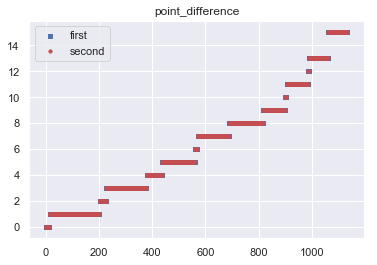

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "team_seed". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


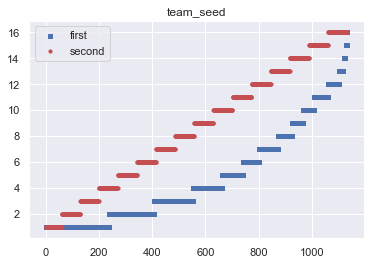

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "win". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


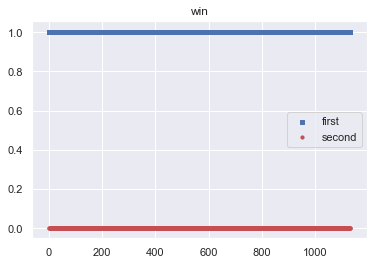

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "higher_or_lower_seed". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


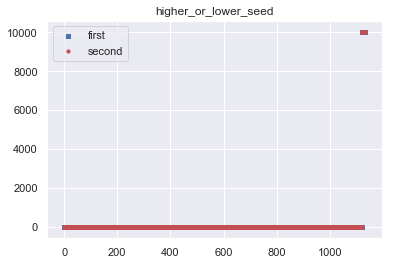

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "BLKPG". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


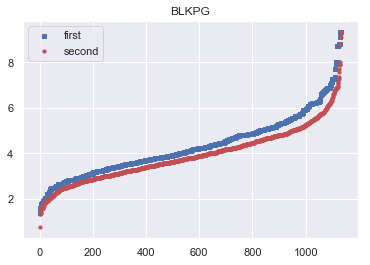

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "STPG". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


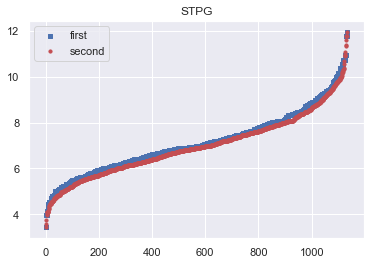

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "APG". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


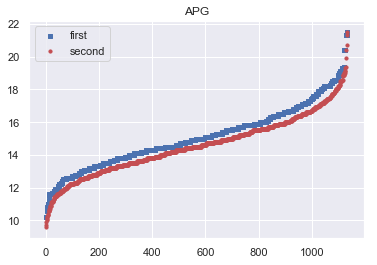

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "AST_TO". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


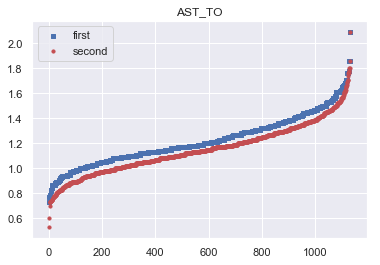

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3pm". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


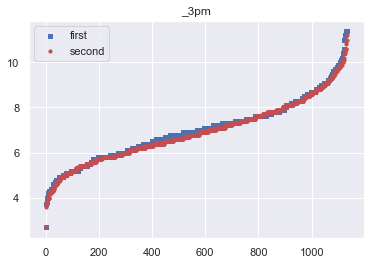

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3pa". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


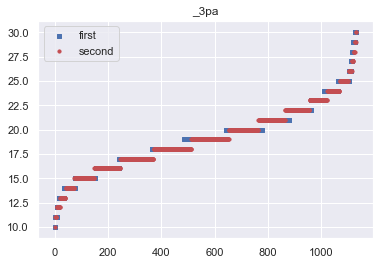

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2pm". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


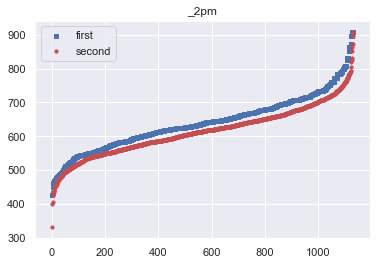

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2pa". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


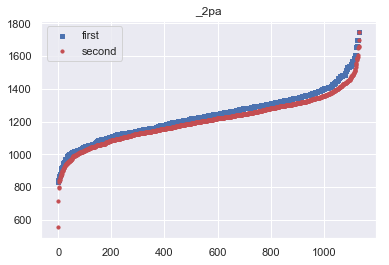

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2p_perc". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


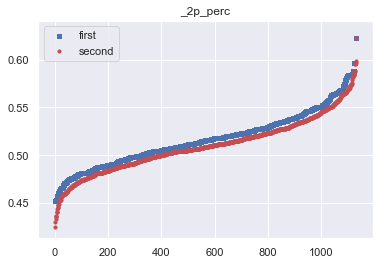

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "PTS". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


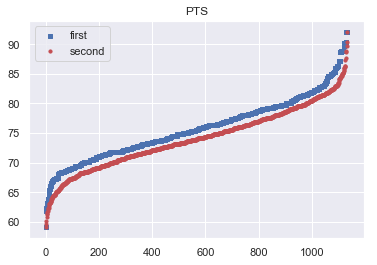

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "FG_perc". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


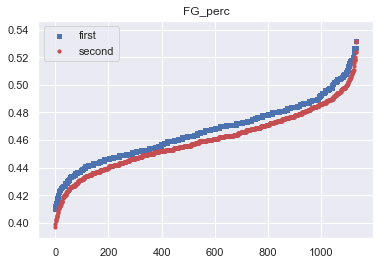

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3p_perc". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


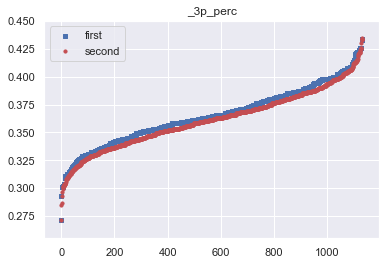

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "FT_perc". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


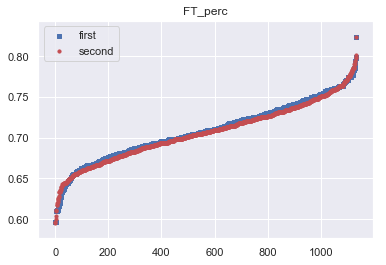

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "year_y". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


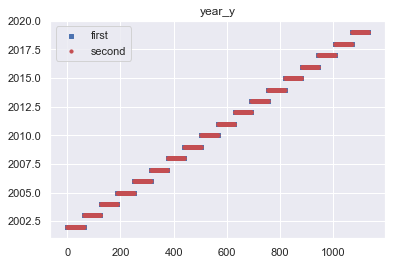

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "ORPG". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


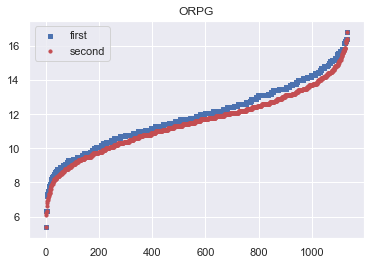

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "DRPG". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


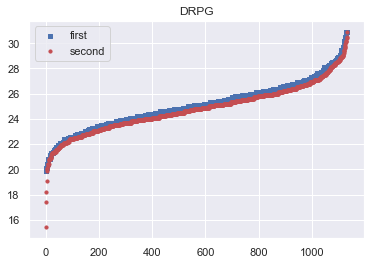

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "RPG". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


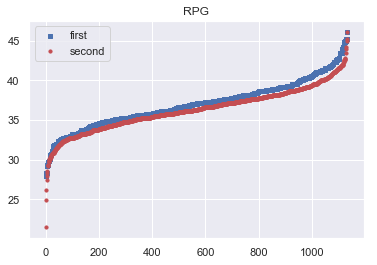

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "SRS_adv". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


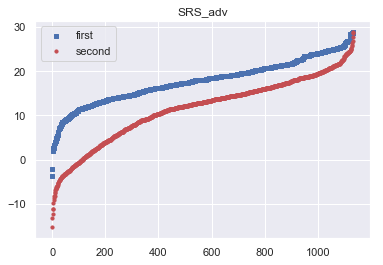

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "SOS_adv". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


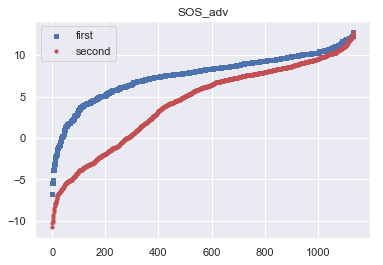

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "eFG_perc_adv". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


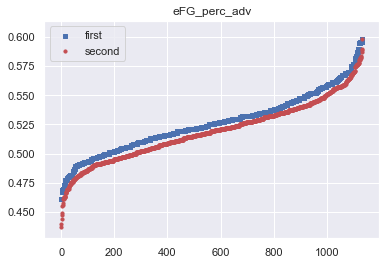

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "year_adv". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


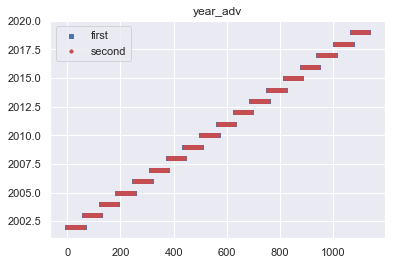

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "SRS_adv_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


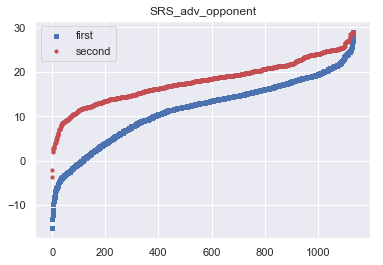

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "SOS_adv_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


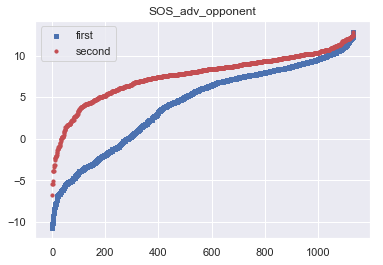

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "eFG_perc_adv_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


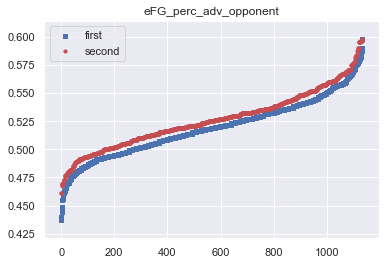

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "SRS_adv_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


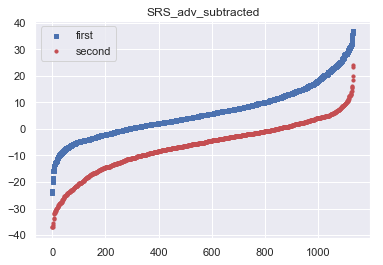

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "SOS_adv_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


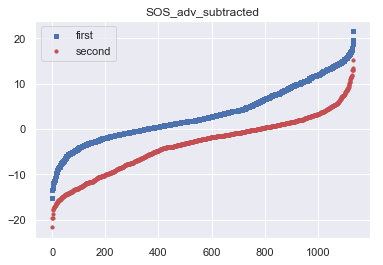

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "eFG_perc_adv_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


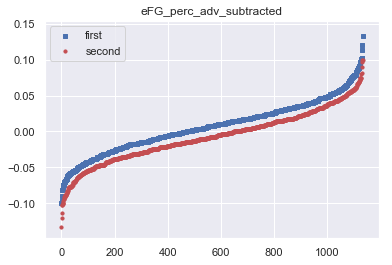

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "BLKPG_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


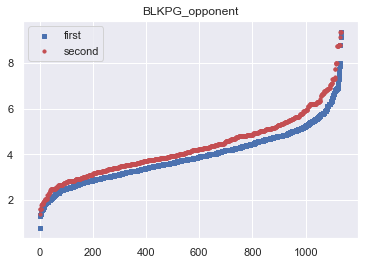

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "STPG_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


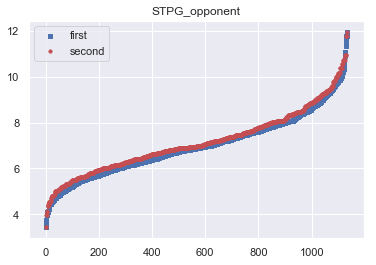

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "APG_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


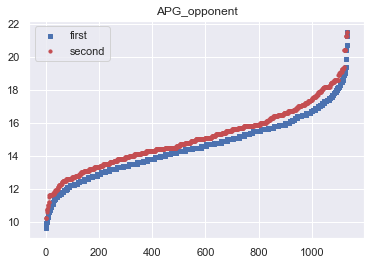

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "AST_TO_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


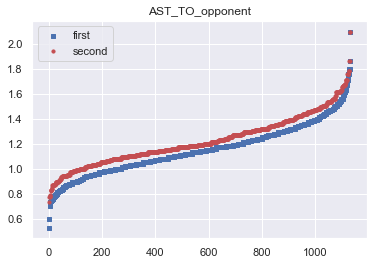

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3pm_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


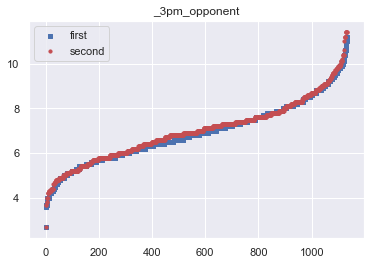

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3pa_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


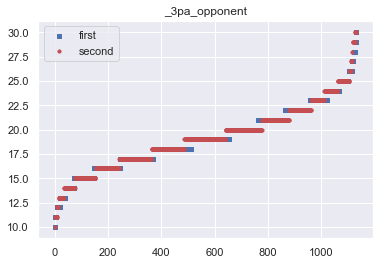

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2pm_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


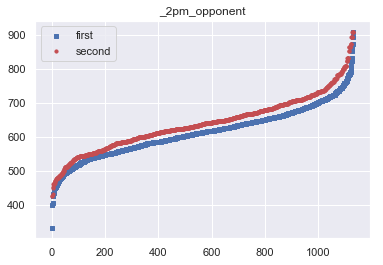

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2pa_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


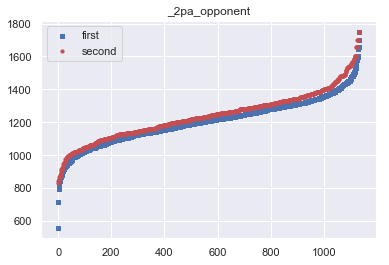

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2p_perc_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


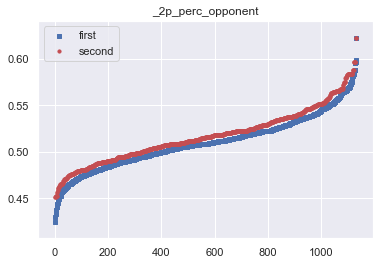

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "FG_perc_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


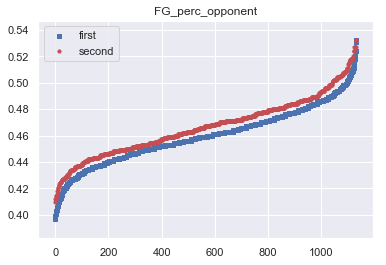

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3p_perc_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


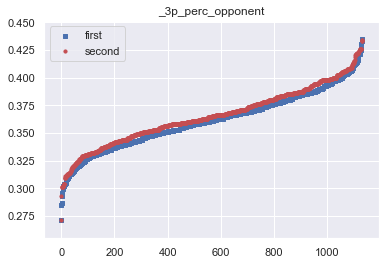

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "FT_perc_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


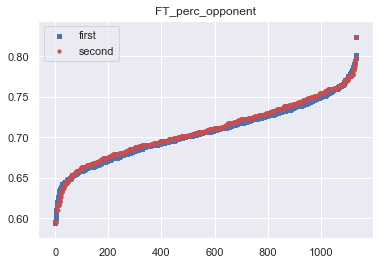

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "ORPG_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


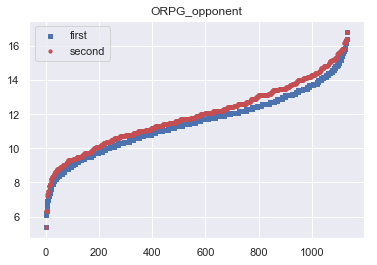

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "DRPG_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


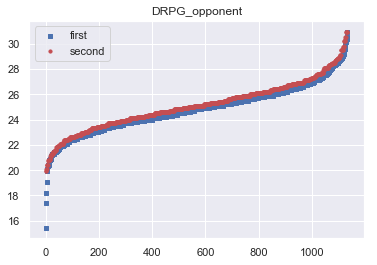

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "RPG_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


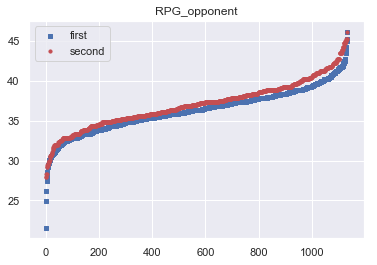

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "BLKPG_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


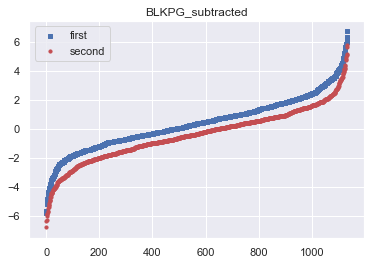

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "STPG_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


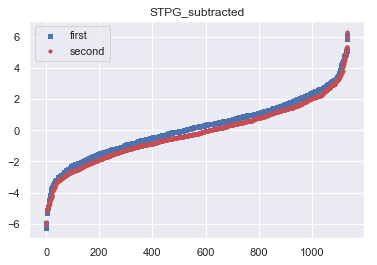

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "APG_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


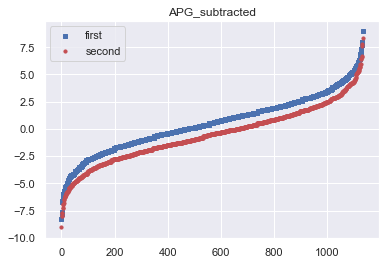

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "AST_TO_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


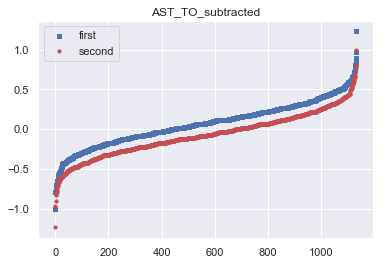

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3pm_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


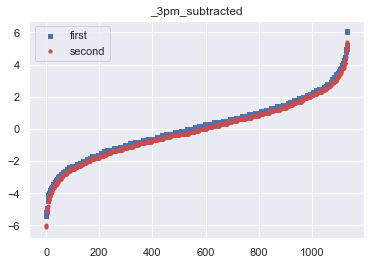

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3pa_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


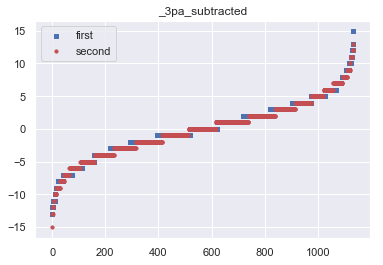

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2pm_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


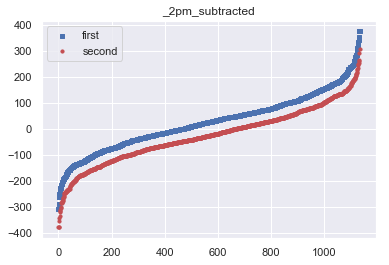

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2pa_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


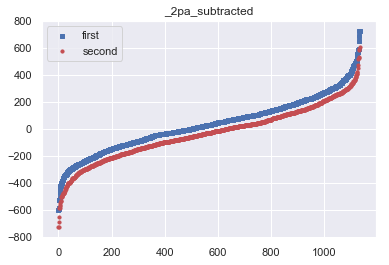

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2p_perc_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


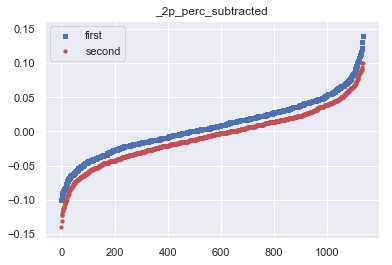

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "PTS_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


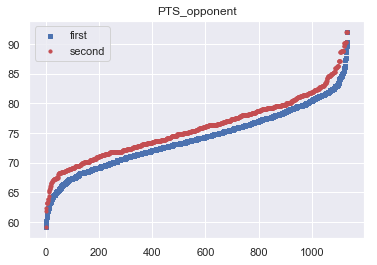

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "PTS_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


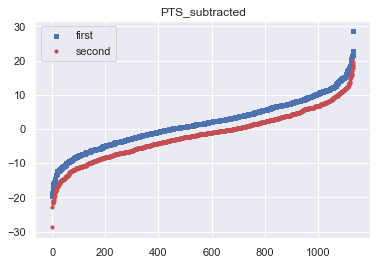

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "FG_perc_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


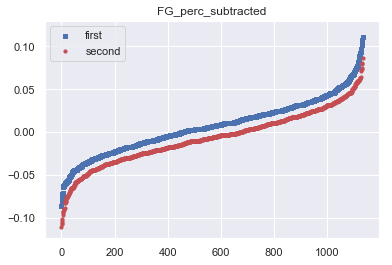

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3p_perc_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


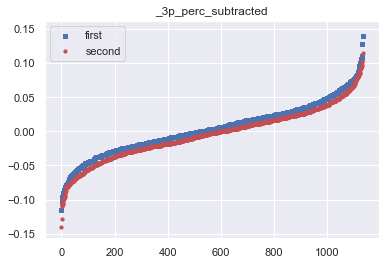

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "FT_perc_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


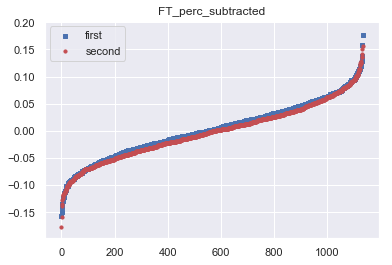

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "ORPG_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


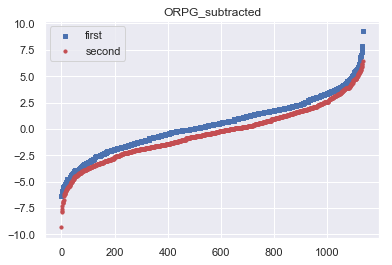

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "DRPG_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


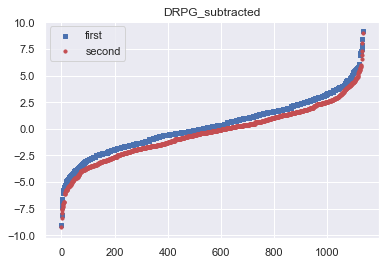

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "RPG_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


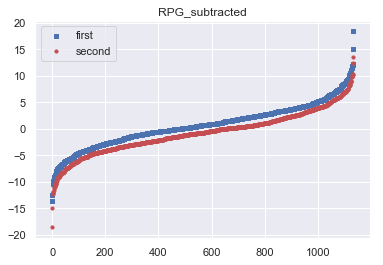

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "wins". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


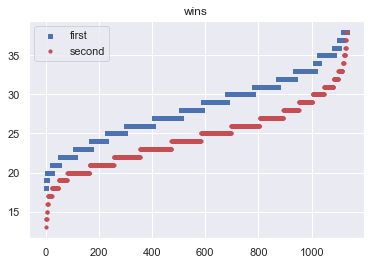

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "losses". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


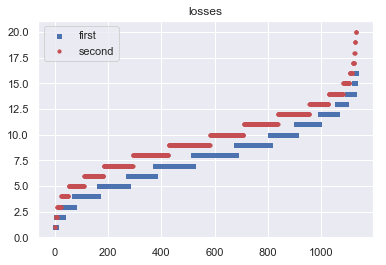

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "kenpom_adjem". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


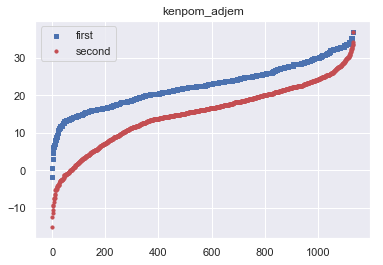

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "wins_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


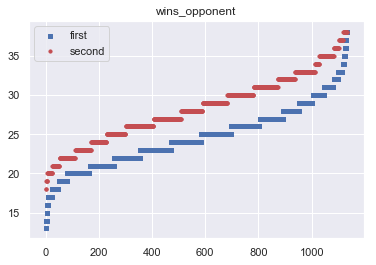

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "losses_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


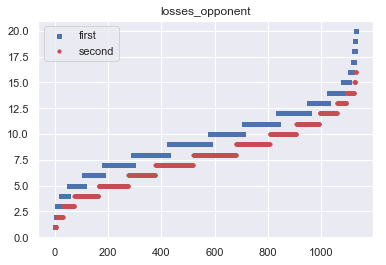

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "kenpom_adjem_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


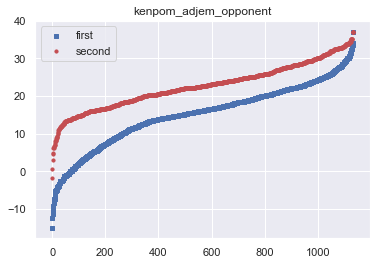

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "wins_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


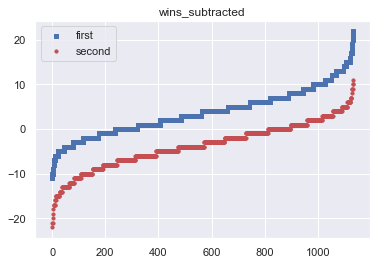

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "losses_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


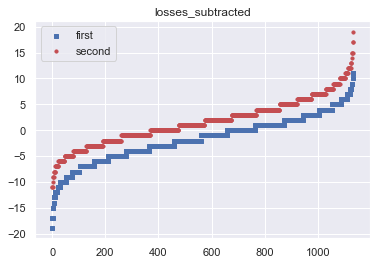

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "kenpom_adjem_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


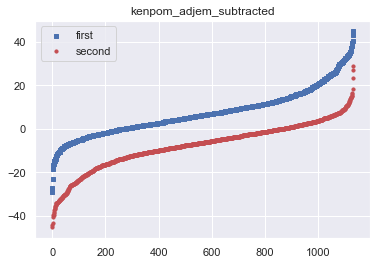

In [41]:
for column in columns:
    make_graph (merged_df,column)

In [545]:
columns = ['point_difference', 'team_seed', 'higher_or_lower_seed', 'BLKPG',
       'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc',
       'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'ORPG', 'DRPG', 'RPG',
       'other_team_seed','PTS_opponent', 'BLKPG_opponent',
       'STPG_opponent', 'APG_opponent', 'AST_TO_opponent', '_3pm_opponent',
       '_3pa_opponent', '_2pm_opponent', '_2pa_opponent', '_2p_perc_opponent',
       'FG_perc_opponent', '_3p_perc_opponent', 'FT_perc_opponent',
       'ORPG_opponent', 'DRPG_opponent', 'RPG_opponent',
       'other_team_seed_opponent', 'BLKPG_subtracted', 'STPG_subtracted',
       'APG_subtracted', 'AST_TO_subtracted', '_3pm_subtracted',
       '_3pa_subtracted', '_2pm_subtracted', '_2pa_subtracted',
       '_2p_perc_subtracted', 'PTS_subtracted', 'FG_perc_subtracted',
       '_3p_perc_subtracted', 'FT_perc_subtracted', 'ORPG_subtracted',
       'DRPG_subtracted', 'RPG_subtracted']

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "point_difference". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


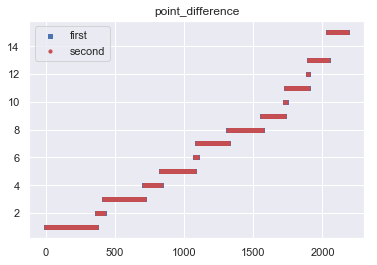

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "team_seed". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


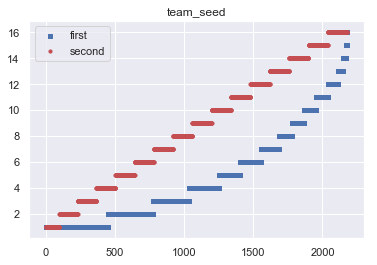

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "higher_or_lower_seed". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


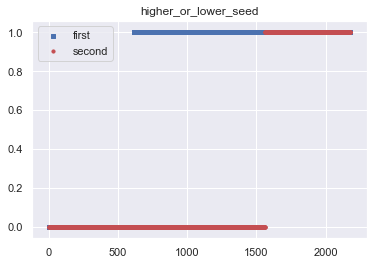

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "BLKPG". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


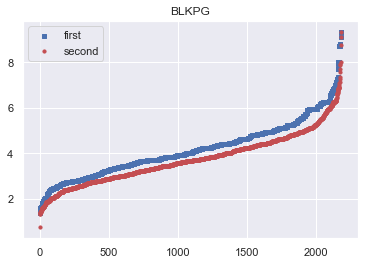

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "STPG". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


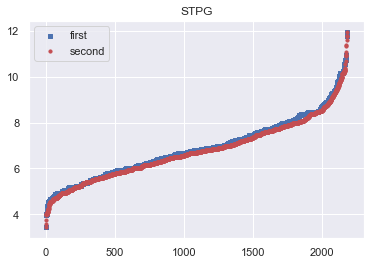

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "APG". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


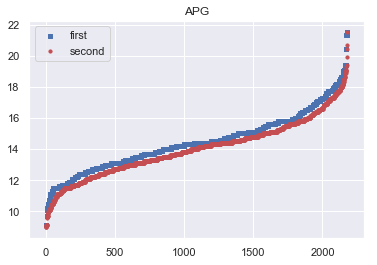

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "AST_TO". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


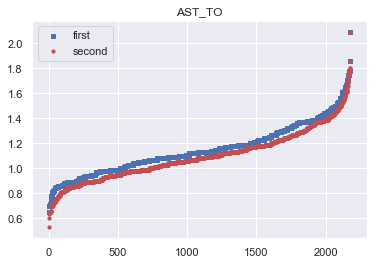

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3pm". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


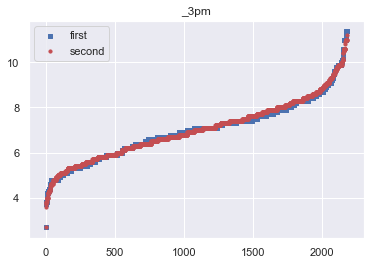

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3pa". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


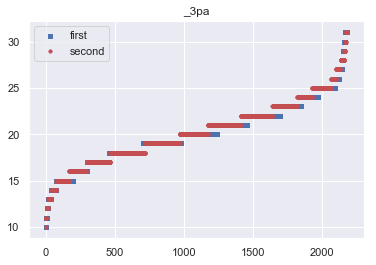

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2pm". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


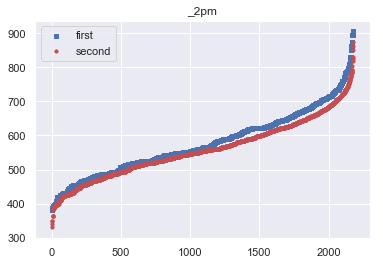

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2pa". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


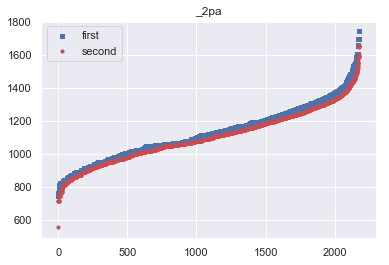

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2p_perc". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


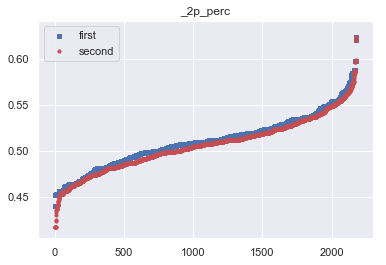

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "PTS". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


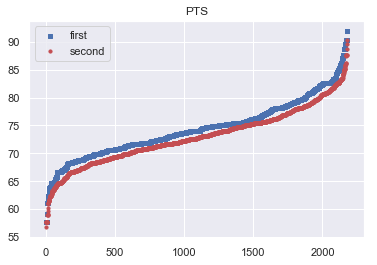

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "FG_perc". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


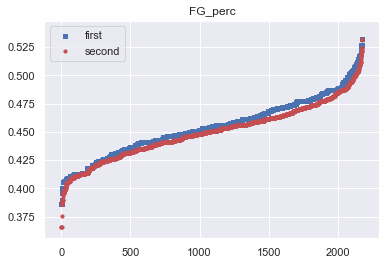

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3p_perc". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


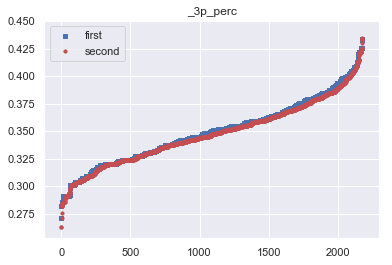

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "FT_perc". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


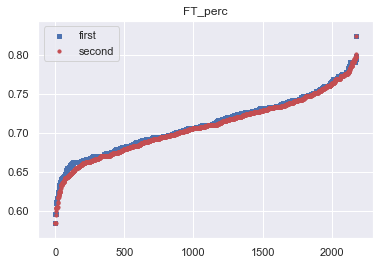

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "ORPG". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


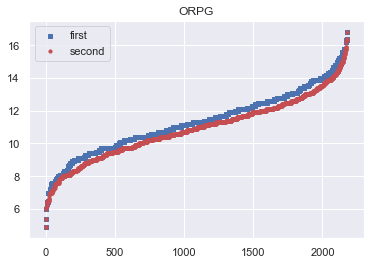

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "DRPG". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


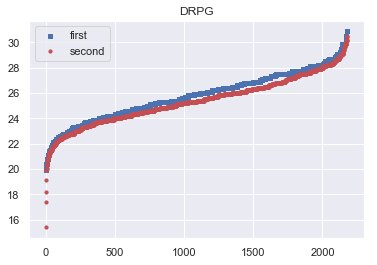

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "RPG". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


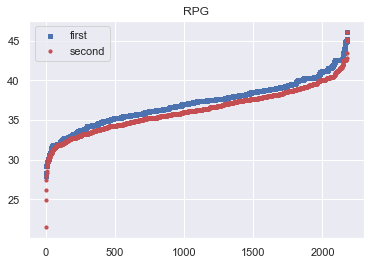

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "other_team_seed". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


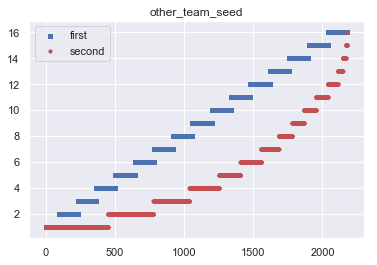

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "PTS_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


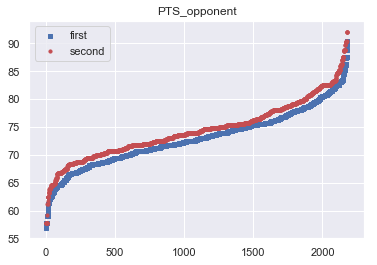

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "BLKPG_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


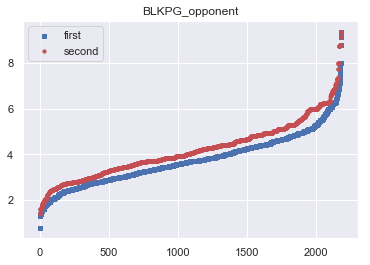

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "STPG_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


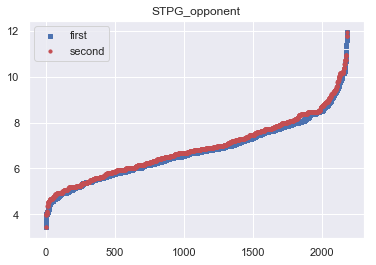

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "APG_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


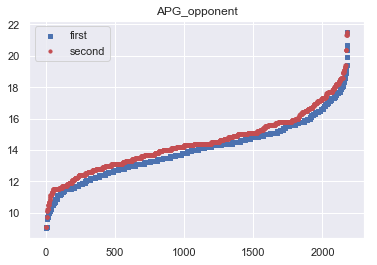

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "AST_TO_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


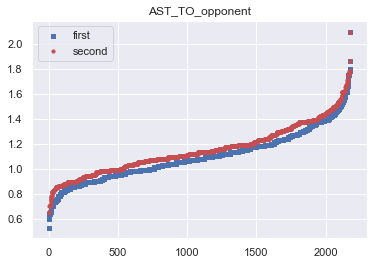

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3pm_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


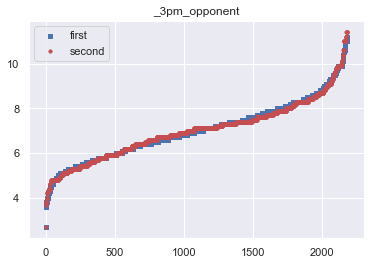

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3pa_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


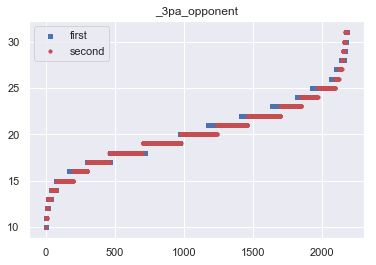

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2pm_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


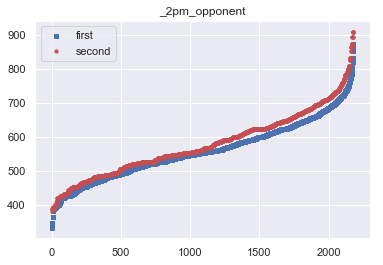

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2pa_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


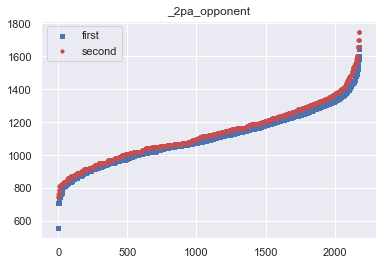

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2p_perc_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


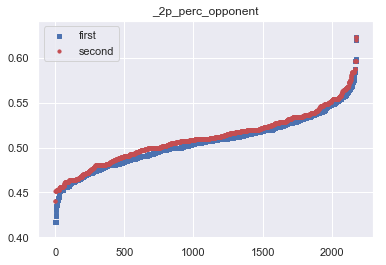

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "FG_perc_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


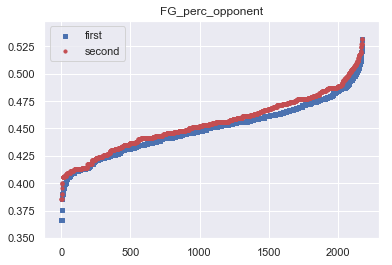

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3p_perc_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


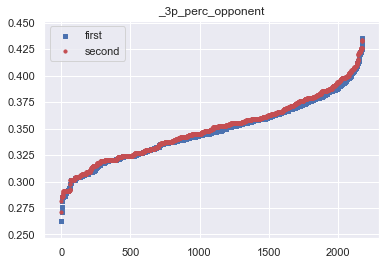

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "FT_perc_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


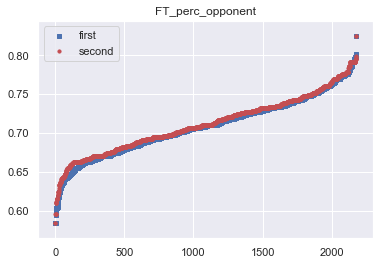

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "ORPG_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


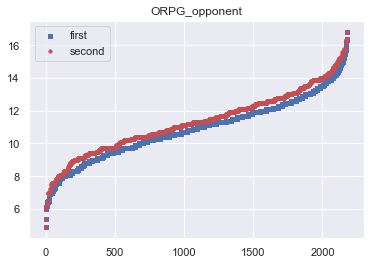

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "DRPG_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


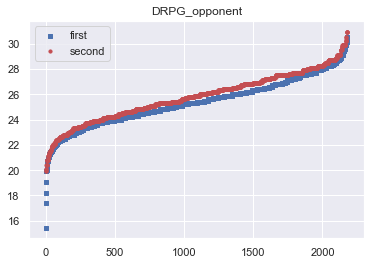

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "RPG_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


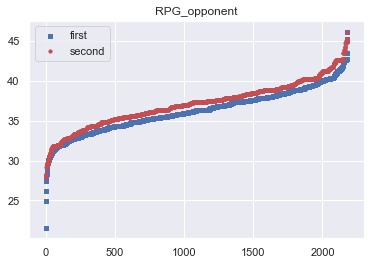

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "other_team_seed_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


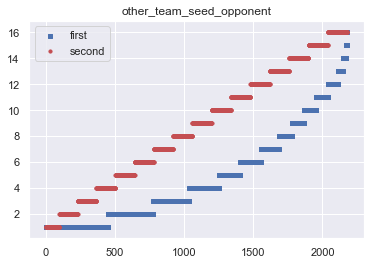

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "BLKPG_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


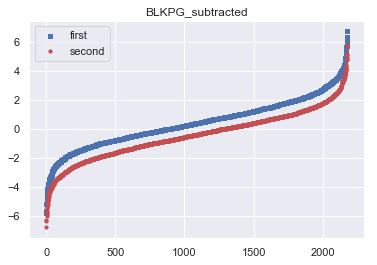

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "STPG_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


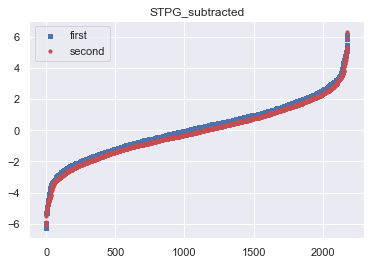

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "APG_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


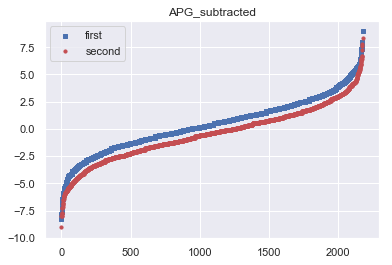

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "AST_TO_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


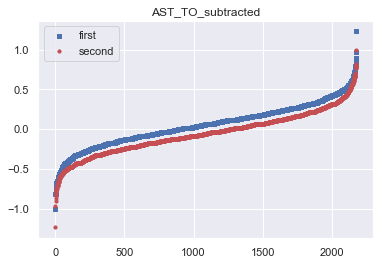

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3pm_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


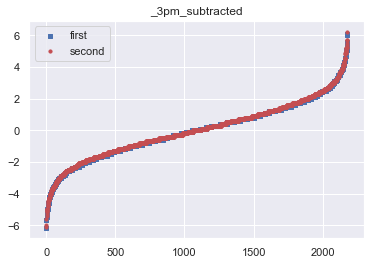

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3pa_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


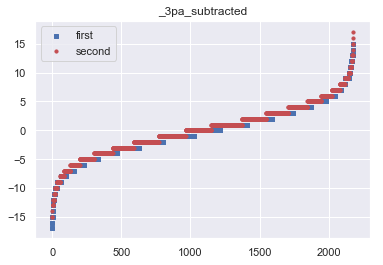

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2pm_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


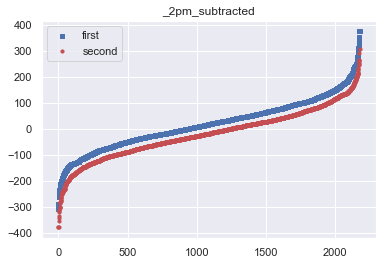

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2pa_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


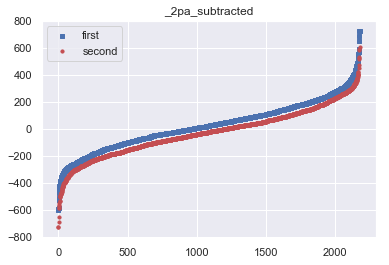

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2p_perc_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


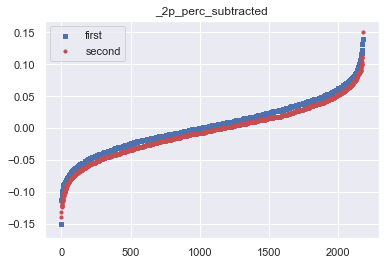

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "PTS_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


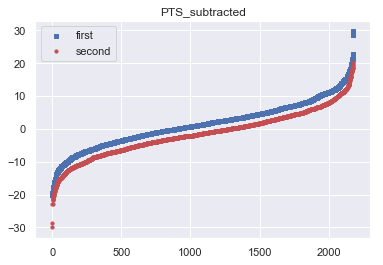

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "FG_perc_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


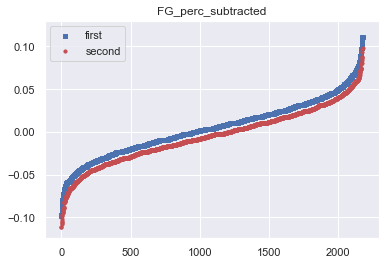

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3p_perc_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


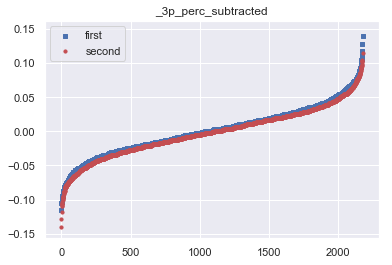

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "FT_perc_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


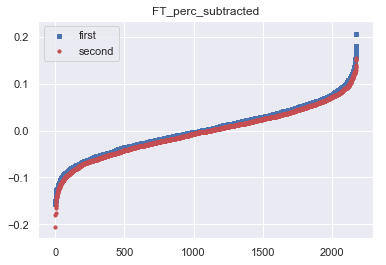

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "ORPG_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


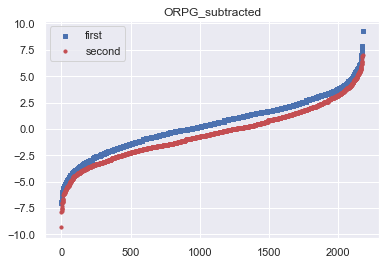

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "DRPG_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


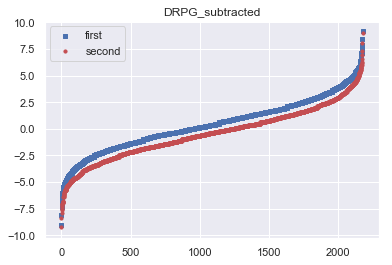

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "RPG_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


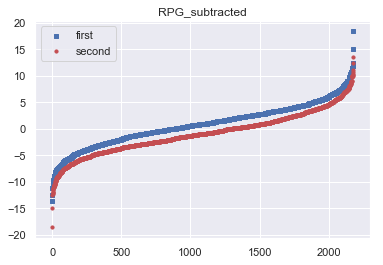

In [555]:
for column in columns:
    make_graph (df1,column)

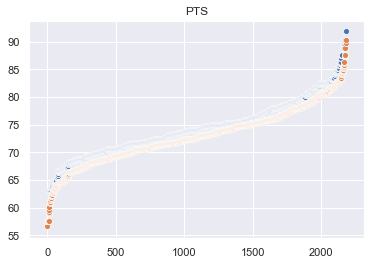

In [543]:
make_graph (df1,'PTS')

Text(0.5, 1.0, 'PTS')

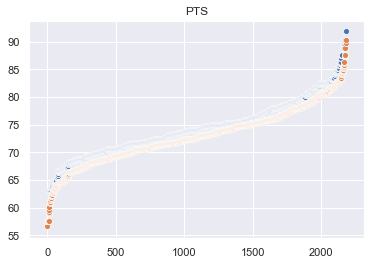

In [540]:
wins=df1[(df1['win']==1)]
losses=df1[(df1['win']==0)]

wins = wins.sort_values(by ='PTS' )
losses = losses.sort_values(by ='PTS' )

wins = wins.sort_values(by ='PTS')
wins = wins.sort_values(by ='PTS')

i=0
index_=[]
for thing in wins['PTS']:
    index_.append(i)
    i+=1
wins['index_']=index_

i=0
index_1=[]
for thing in losses['PTS']:
    index_1.append(i)
    i+=1
losses['index_']=index_1


ax = sns.scatterplot(list(wins['index_']),list(wins['PTS']))
ax = sns.scatterplot(list(losses['index_']),list(losses['PTS']))
ax.set_title('PTS')

In [535]:
wins=df1[(df1['win']==1)]
losses=df1[(df1['win']==0)]

wins = wins.sort_values(by ='PTS' )
losses = losses.sort_values(by ='PTS' )

wins = wins.sort_values(by ='PTS')
wins = wins.sort_values(by ='PTS')



In [536]:
i=0
index_=[]
for thing in wins['PTS']:
    index_.append(i)
    i+=1
wins['index_']=index_


In [537]:
i=0
index_1=[]
for thing in losses['PTS']:
    index_1.append(i)
    i+=1
losses['index_']=index_1

In [538]:
losses

,point_difference,team_seed,win,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,round,PTS_opponent,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,other_team_seed_opponent,BLKPG_subtracted,STPG_subtracted,APG_subtracted,AST_TO_subtracted,_3pm_subtracted,_3pa_subtracted,_2pm_subtracted,_2pa_subtracted,_2p_perc_subtracted,PTS_subtracted,FG_perc_subtracted,_3p_perc_subtracted,FT_perc_subtracted,ORPG_subtracted,DRPG_subtracted,RPG_subtracted,index_
893,11,14,0,0,2.58,7.12,11.3,0.90,7.1,23.0,341.0,805.0,0.424,56.8,0.376,0.310,0.634,7.9,24.7,32.6,3,1,68.7,3.07,7.04,13.1,0.98,7.4,23.0,469.0,952.0,0.493,0.426,0.324,0.691,9.4,23.3,32.7,14,-0.49,0.08,-1.8,-0.08,-0.3,0.0,-128.0,-147.0,-0.069,-11.9,-0.050,-0.014,-0.057,-1.5,1.4,-0.1,0
592,2,5,0,0,4.65,5.42,11.6,0.94,5.8,19.0,395.0,821.0,0.481,57.7,0.414,0.304,0.711,8.3,25.9,34.2,3,4,75.4,4.63,5.37,15.0,1.37,8.3,24.0,526.0,982.0,0.536,0.460,0.345,0.717,9.1,28.0,37.0,5,0.02,0.05,-3.4,-0.43,-2.5,-5.0,-131.0,-161.0,-0.055,-17.7,-0.046,-0.041,-0.006,-0.8,-2.1,-2.8,1
130,7,5,0,1,4.65,5.42,11.6,0.94,5.8,19.0,395.0,821.0,0.481,57.7,0.414,0.304,0.711,8.3,25.9,34.2,12,1,72.5,5.11,8.52,14.2,0.98,5.9,18.0,561.0,1125.0,0.499,0.446,0.325,0.643,11.5,26.0,37.4,5,-0.46,-3.10,-2.6,-0.04,-0.1,1.0,-166.0,-304.0,-0.018,-14.8,-0.032,-0.021,0.068,-3.2,-0.1,-3.2,2
712,5,7,0,0,4.65,5.42,11.6,0.94,5.8,19.0,395.0,821.0,0.481,57.7,0.414,0.304,0.711,8.3,25.9,34.2,2,2,74.0,4.41,7.30,14.2,1.23,8.4,25.0,453.0,890.0,0.509,0.435,0.337,0.743,10.2,25.3,35.5,7,0.24,-1.88,-2.6,-0.29,-2.6,-6.0,-58.0,-69.0,-0.028,-16.3,-0.021,-0.033,-0.032,-1.9,0.6,-1.3,3
858,3,7,0,1,4.65,5.42,11.6,0.94,5.8,19.0,395.0,821.0,0.481,57.7,0.414,0.304,0.711,8.3,25.9,34.2,10,1,80.6,2.13,5.83,17.6,1.61,10.6,25.0,580.0,1033.0,0.561,0.503,0.422,0.706,6.5,26.5,33.0,7,2.52,-0.41,-6.0,-0.67,-4.8,-6.0,-185.0,-212.0,-0.080,-22.9,-0.089,-0.118,0.005,1.8,-0.6,1.2,4
1246,5,7,0,0,4.65,5.42,11.6,0.94,5.8,19.0,395.0,821.0,0.481,57.7,0.414,0.304,0.711,8.3,25.9,34.2,2,2,78.1,3.85,6.67,15.6,1.37,7.3,20.0,537.0,1060.0,0.507,0.456,0.359,0.732,10.7,26.8,37.5,7,0.80,-1.25,-4.0,-0.43,-1.5,-1.0,-142.0,-239.0,-0.026,-20.4,-0.042,-0.055,-0.021,-2.4,-0.9,-3.3,5
1605,1,9,0,0,4.65,5.42,11.6,0.94,5.8,19.0,395.0,821.0,0.481,57.7,0.414,0.304,0.711,8.3,25.9,34.2,8,1,78.5,3.70,6.48,17.3,1.43,7.9,23.0,527.0,1019.0,0.517,0.455,0.351,0.741,11.4,26.0,37.5,9,0.95,-1.06,-5.7,-0.49,-2.1,-4.0,-132.0,-198.0,-0.036,-20.8,-0.041,-0.047,-0.030,-3.1,-0.1,-3.3,6
346,7,5,0,1,4.65,5.42,11.6,0.94,5.8,19.0,395.0,821.0,0.481,57.7,0.414,0.304,0.711,8.3,25.9,34.2,12,1,61.1,2.04,5.21,10.7,0.82,7.2,24.0,394.0,787.0,0.501,0.411,0.304,0.721,4.9,24.4,29.2,5,2.61,0.21,0.9,0.12,-1.4,-5.0,1.0,34.0,-0.020,-3.4,0.003,0.000,-0.010,3.4,1.5,5.0,7
1034,4,6,0,0,4.65,5.42,11.6,0.94,5.8,19.0,395.0,821.0,0.481,57.7,0.414,0.304,0.711,8.3,25.9,34.2,2,3,73.5,4.85,6.67,15.1,1.03,6.6,21.0,519.0,1000.0,0.519,0.446,0.317,0.676,11.1,27.2,38.3,6,-0.20,-1.25,-3.5,-0.09,-0.8,-2.0,-124.0,-179.0,-0.038,-15.8,-0.032,-0.013,0.035,-2.8,-1.3,-4.1,8
1318,2,4,0,0,4.65,5.42,11.6,0.94,5.8,19.0,395.0,821.0,0.481,57.7,0.414,0.304,0.711,8.3,25.9,34.2,2,4,74.0,3.67,8.37,11.7,0.98,7.1,22.0,487.0,953.0,0.511,0.437,0.320,0.727,7.6,24.2,31.8,4,0.98,-2.95,-0.1,-0.04,-1.3,-3.0,-92.0,-132.0,-0.030,-16.3,-0.023,-0.016,-0.016,0.7,1.7,2.4,9


# Insert rounds back in

In [24]:
#make sure at bottom to change number in function when reassigning the round_ to 0:number in dataframe
def split_all_data_up (df,column):
    round_=[]
    i=0
    for thing in list(column):
        if i== 62:
            round_.append(6)
            round_.append(6)
            i=0
        elif 0<=i<=7 or 15<=i<=22 or 30<=i<=37 or 45<=i<=52:
            round_.append(1)
            round_.append(1)
            i+=1
        elif 8<=i<=11 or 23<=i<=26 or 38<=i<=41 or 53<=i<=56:
            round_.append(2)
            round_.append(2)
            i+=1
        elif 12<=i<=13 or 27<=i<=28 or 42<=i<=43 or 57<=i<=58:
            round_.append(3)
            round_.append(3)
            i+=1
        elif i==14 or i==29 or i==44 or i==59:
            round_.append(4)
            round_.append(4)
            i+=1
        elif i == 60 or i == 61:
            round_.append(5)
            round_.append(5)
            i+=1
    round_ = round_[0:3402]
    return round_

In [20]:
len(df1['winner'])


3402

In [21]:
x = [1,2,3,4,5]

In [23]:
x[0:5]

[1, 2, 3, 4, 5]

In [25]:
blah=split_all_data_up (df1,df1['point_difference'])

In [26]:
df1['round']=blah

In [27]:
df1

,Unnamed: 0,Unnamed: 0.1,winner,point_difference,result,name_x,team_seed,win,higher_or_lower_seed,index,year_x,Name,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,year_y,ORPG,DRPG,RPG,other_team_seed,names_for_merging_sr,index_everything,name_y,SRS_adv,SOS_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,eFG_perc_adv_subtracted,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,other_team_seed_opponent,BLKPG_subtracted,STPG_subtracted,APG_subtracted,AST_TO_subtracted,_3pm_subtracted,_3pa_subtracted,_2pm_subtracted,_2pa_subtracted,_2p_perc_subtracted,PTS_opponent,PTS_subtracted,FG_perc_subtracted,_3p_perc_subtracted,FT_perc_subtracted,ORPG_subtracted,DRPG_subtracted,RPG_subtracted,round
0,0,1008,1,15,1,UNC,1,1,1,0,1993,North Carolina,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,70.6,0.413,0.291,0.663,1993,13.9,28.7,42.6,16,North Carolina,0,North Carolina,29.04,11.25,0.541,1993,-2.02,0.95,0.465,31.06,10.30,0.076,3.25,6.75,14.0,1.02,5.4,19.0,512.0,1055.0,0.485,0.417,0.284,0.725,9.8,26.1,35.9,1,0.45,-0.82,0.4,0.06,-0.1,-1.0,40.0,135.0,-0.021,68.5,2.1,-0.004,0.007,-0.062,4.1,2.6,6.7,1
1,1,1009,1,15,1,East Carolina,16,0,0,1,1993,East Carolina,3.25,6.75,14.0,1.02,5.4,19.0,512.0,1055.0,0.485,68.5,0.417,0.284,0.725,1993,9.8,26.1,35.9,1,East Carolina,1,East Carolina,-2.02,0.95,0.465,1993,29.04,11.25,0.541,-31.06,-10.30,-0.076,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,0.413,0.291,0.663,13.9,28.7,42.6,16,-0.45,0.82,-0.4,-0.06,0.1,1.0,-40.0,-135.0,0.021,70.6,-2.1,0.004,-0.007,0.062,-4.1,-2.6,-6.7,1
2,2,1010,8,1,1,Rhode Island,8,1,1,2,1993,Rhode Island,4.00,8.73,12.7,1.05,5.7,18.0,544.0,1159.0,0.469,74.7,0.428,0.323,0.692,1993,12.1,27.3,39.4,9,Rhode Island,2,Rhode Island,9.50,6.40,0.484,1993,12.96,9.63,0.519,-3.46,-3.23,-0.035,3.43,6.46,13.5,1.18,7.4,22.0,506.0,1077.0,0.470,0.424,0.342,0.670,12.5,23.9,36.4,8,0.57,2.27,-0.8,-0.13,-1.7,-4.0,38.0,82.0,-0.001,68.3,6.4,0.004,-0.019,0.022,-0.4,3.4,3.0,1
3,3,1011,8,1,1,Purdue,9,0,0,3,1993,Purdue,3.43,6.46,13.5,1.18,7.4,22.0,506.0,1077.0,0.470,68.3,0.424,0.342,0.670,1993,12.5,23.9,36.4,8,Purdue,3,Purdue,12.96,9.63,0.519,1993,9.50,6.40,0.484,3.46,3.23,0.035,4.00,8.73,12.7,1.05,5.7,18.0,544.0,1159.0,0.469,0.428,0.323,0.692,12.1,27.3,39.4,9,-0.57,-2.27,0.8,0.13,1.7,4.0,-38.0,-82.0,0.001,74.7,-6.4,-0.004,0.019,-0.022,0.4,-3.4,-3.0,1
4,4,1012,5,7,1,St. John's (NY),5,1,1,4,1993,St. John's,4.22,10.15,14.6,1.24,6.4,21.0,559.0,1235.0,0.453,74.7,0.407,0.307,0.711,1993,13.0,26.5,39.4,12,St. John's (NY),4,St. John's (NY),13.16,9.49,0.504,1993,2.91,1.56,0.530,10.25,7.93,-0.026,4.11,8.00,15.8,1.15,7.3,20.0,492.0,950.0,0.518,0.461,0.361,0.754,9.0,24.7,33.7,5,0.11,2.15,-1.2,0.09,-0.9,1.0,67.0,285.0,-0.065,73.7,1.0,-0.054,-0.054,-0.043,4.0,1.8,5.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,3350,4405,1,4,1,Auburn,5,0,0,121,2019,Auburn,4.79,9.29,14.4,1.18,11.2,30.0,549.0,1059.0,0.518,79.4,0.449,0.376,0.710,2019,12.0,22.4,34.5,1,Auburn,3397,Auburn,20.84,10.92,0.543,2019,25.46,10.15,0.552,-4.62,0.77,-0.009,3.81,5.63,14.5,1.61,8.5,21.0,549.0,1052.0,0.522,0.478,0.409,0.746,8.9,25.8,34.6,5,0.98,3.66,-0.1,-0.43,2.7,9.0,0.0,7.0,-0.004,71.8,7.6,-0.029,-0.033,-0.036,3.1,-3.4,-0.1,5
3398,3329,4406,3,1,2,Texas Tech,3,1,0,122,2019,Texas Tech,4.91,7.38,14.0,1.13,7.3,20.0,605.0,1144.0,0.529,73.1,0.472,0.368,0.728,2019,8.8,25.4,34.3,2,Texas Tech,3398,Texas Tech,22.79,9.53,0.535,2019,24.93,12.34,0.552,-2.14,-2.81,-0.017,5.45,5.33,19.1,1.47,8.3,22.0,649.0,1177.0,0.551,0.488,0.383,0

In [28]:
df1.to_csv('1993_2019_everything.cvs')

In [608]:
merged_df1

,Unnamed: 0,winner,point_difference,result,name_x,team_seed,win,higher_or_lower_seed,index,year_x,Name,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,year_y,ORPG,DRPG,RPG,other_team_seed,names_for_merging_sr,index_everything,name_y,SRS_adv,SOS_adv,pace_adv,ORtg_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,pace_adv_opponent,ORtg_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,pace_adv_subtracted,ORtg_adv_subtracted,eFG_perc_adv_subtracted,round
0,0,1,15,1,Ohio State,1,1,1,0,2011,Ohio State,3.32,7.18,15.6,1.53,7.4,18.0,682.0,1282.0,0.532,77.1,0.494,0.413,0.705,2011,11.2,23.3,34.5,16,Ohio State,0,Ohio State,25.84,8.38,64.1,120.0,0.563,2011,-5.80,-4.93,68.8,102.0,0.491,31.64,13.31,-4.7,18.0,0.072,1
1,1,1,15,1,UTSA,16,0,0,1,2011,UTSA,2.38,7.16,12.8,0.94,7.1,20.0,535.0,1130.0,0.473,70.9,0.431,0.356,0.706,2011,10.7,24.3,35.0,1,Texas-San Antonio,1,Texas-San Antonio,-5.80,-4.93,68.8,102.0,0.491,2011,25.84,8.38,64.1,120.0,0.563,-31.64,-13.31,4.7,-18.0,-0.072,1
2,2,8,1,1,George Mason,8,1,1,2,2011,George Mason,3.31,6.75,14.3,1.31,6.7,17.0,614.0,1206.0,0.509,73.3,0.474,0.397,0.690,2011,10.6,24.5,35.1,9,George Mason,2,George Mason,11.66,1.37,64.3,111.9,0.532,2011,15.05,8.23,65.7,109.6,0.495,-3.39,-6.86,-1.4,2.3,0.037,1
3,3,8,1,1,Villanova,9,0,0,3,2011,Villanova,3.75,6.34,13.8,1.15,6.3,18.0,574.0,1185.0,0.484,72.7,0.440,0.349,0.758,2011,12.3,24.9,37.1,8,Villanova,3,Villanova,15.05,8.23,65.7,109.6,0.495,2011,11.66,1.37,64.3,111.9,0.532,3.39,6.86,1.4,-2.3,-0.037,1
4,4,5,7,1,West Virginia,5,1,1,4,2011,West Virginia,4.29,4.61,15.1,1.25,6.3,19.0,540.0,1139.0,0.474,69.5,0.427,0.335,0.706,2011,14.4,23.0,37.4,12,West Virginia,4,West Virginia,16.15,11.03,64.0,109.0,0.485,2011,13.76,6.58,65.1,104.5,0.503,2.39,4.45,-1.1,4.5,-0.018,1
5,5,5,7,1,Clemson,12,0,0,5,2011,Clemson,4.88,8.03,12.9,0.96,6.5,19.0,551.0,1123.0,0.491,68.3,0.442,0.349,0.693,2011,11.5,23.4,34.9,5,Clemson,5,Clemson,13.76,6.58,65.1,104.5,0.503,2011,16.15,11.03,64.0,109.0,0.485,-2.39,-4.45,1.1,-4.5,0.018,1
6,6,4,9,1,Kentucky,4,1,1,6,2011,Kentucky,6.27,5.48,12.7,1.19,7.4,19.0,641.0,1308.0,0.490,76.4,0.460,0.397,0.718,2011,12.1,26.0,38.1,13,Kentucky,6,Kentucky,20.30,8.91,66.2,112.8,0.523,2011,3.71,-1.61,63.4,107.0,0.522,16.59,10.52,2.8,5.8,0.001,1
7,7,4,9,1,Princeton,13,0,0,7,2011,Princeton,4.26,5.90,13.5,1.09,6.1,17.0,574.0,1127.0,0.509,69.6,0.465,0.368,0.731,2011,9.9,24.8,34.7,4,Princeton,7,Princeton,3.71,-1.61,63.4,107.0,0.522,2011,20.30,8.91,66.2,112.8,0.523,-16.59,-10.52,-2.8,-5.8,-0.001,1
8,8,11,5,2,Xavier,6,0,1,8,2011,Xavier,3.10,5.52,13.3,1.11,5.5,17.0,592.0,1136.0,0.521,72.6,0.463,0.333,0.748,2011,10.2,25.3,35.5,11,Xavier,8,Xavier,11.88,4.41,65.3,108.7,0.512,2011,14.89,8.51,68.0,110.2,0.510,-3.01,-4.10,-2.7,-1.5,0.002,1
9,9,11,5,2,Marquette,11,1,0,9,2011,Marquette,3.62,7.18,15.8,1.32,5.3,15.0,726.0,1427.0,0.509,76.1,0.468,0.352,0.691,2011,12.4,23.8,36.2,6,Marquette,9,Marquette,14.89,8.51,68.0,110.2,0.510,2011,11.88,4.41,65.3,108.7,0.512,3.01,4.10,2.7,1.5,-0.002,1


In [29]:
please = pd.read_csv('1993_2019_everything.cvs', sep=',')

In [30]:
please

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,winner,point_difference,result,name_x,team_seed,win,higher_or_lower_seed,index,year_x,Name,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,year_y,ORPG,DRPG,RPG,other_team_seed,names_for_merging_sr,index_everything,name_y,SRS_adv,SOS_adv,eFG_perc_adv,year_adv,SRS_adv_opponent,SOS_adv_opponent,eFG_perc_adv_opponent,SRS_adv_subtracted,SOS_adv_subtracted,eFG_perc_adv_subtracted,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,other_team_seed_opponent,BLKPG_subtracted,STPG_subtracted,APG_subtracted,AST_TO_subtracted,_3pm_subtracted,_3pa_subtracted,_2pm_subtracted,_2pa_subtracted,_2p_perc_subtracted,PTS_opponent,PTS_subtracted,FG_perc_subtracted,_3p_perc_subtracted,FT_perc_subtracted,ORPG_subtracted,DRPG_subtracted,RPG_subtracted,round
0,0,0,1008,1,15,1,UNC,1,1,1,0,1993,North Carolina,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,70.6,0.413,0.291,0.663,1993,13.9,28.7,42.6,16,North Carolina,0,North Carolina,29.04,11.25,0.541,1993,-2.02,0.95,0.465,31.06,10.30,0.076,3.25,6.75,14.0,1.02,5.4,19.0,512.0,1055.0,0.485,0.417,0.284,0.725,9.8,26.1,35.9,1,0.45,-0.82,0.4,0.06,-0.1,-1.0,40.0,135.0,-0.021,68.5,2.1,-0.004,0.007,-0.062,4.1,2.6,6.7,1
1,1,1,1009,1,15,1,East Carolina,16,0,0,1,1993,East Carolina,3.25,6.75,14.0,1.02,5.4,19.0,512.0,1055.0,0.485,68.5,0.417,0.284,0.725,1993,9.8,26.1,35.9,1,East Carolina,1,East Carolina,-2.02,0.95,0.465,1993,29.04,11.25,0.541,-31.06,-10.30,-0.076,3.70,5.93,14.4,1.08,5.3,18.0,552.0,1190.0,0.464,0.413,0.291,0.663,13.9,28.7,42.6,16,-0.45,0.82,-0.4,-0.06,0.1,1.0,-40.0,-135.0,0.021,70.6,-2.1,0.004,-0.007,0.062,-4.1,-2.6,-6.7,1
2,2,2,1010,8,1,1,Rhode Island,8,1,1,2,1993,Rhode Island,4.00,8.73,12.7,1.05,5.7,18.0,544.0,1159.0,0.469,74.7,0.428,0.323,0.692,1993,12.1,27.3,39.4,9,Rhode Island,2,Rhode Island,9.50,6.40,0.484,1993,12.96,9.63,0.519,-3.46,-3.23,-0.035,3.43,6.46,13.5,1.18,7.4,22.0,506.0,1077.0,0.470,0.424,0.342,0.670,12.5,23.9,36.4,8,0.57,2.27,-0.8,-0.13,-1.7,-4.0,38.0,82.0,-0.001,68.3,6.4,0.004,-0.019,0.022,-0.4,3.4,3.0,1
3,3,3,1011,8,1,1,Purdue,9,0,0,3,1993,Purdue,3.43,6.46,13.5,1.18,7.4,22.0,506.0,1077.0,0.470,68.3,0.424,0.342,0.670,1993,12.5,23.9,36.4,8,Purdue,3,Purdue,12.96,9.63,0.519,1993,9.50,6.40,0.484,3.46,3.23,0.035,4.00,8.73,12.7,1.05,5.7,18.0,544.0,1159.0,0.469,0.428,0.323,0.692,12.1,27.3,39.4,9,-0.57,-2.27,0.8,0.13,1.7,4.0,-38.0,-82.0,0.001,74.7,-6.4,-0.004,0.019,-0.022,0.4,-3.4,-3.0,1
4,4,4,1012,5,7,1,St. John's (NY),5,1,1,4,1993,St. John's,4.22,10.15,14.6,1.24,6.4,21.0,559.0,1235.0,0.453,74.7,0.407,0.307,0.711,1993,13.0,26.5,39.4,12,St. John's (NY),4,St. John's (NY),13.16,9.49,0.504,1993,2.91,1.56,0.530,10.25,7.93,-0.026,4.11,8.00,15.8,1.15,7.3,20.0,492.0,950.0,0.518,0.461,0.361,0.754,9.0,24.7,33.7,5,0.11,2.15,-1.2,0.09,-0.9,1.0,67.0,285.0,-0.065,73.7,1.0,-0.054,-0.054,-0.043,4.0,1.8,5.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,3397,3350,4405,1,4,1,Auburn,5,0,0,121,2019,Auburn,4.79,9.29,14.4,1.18,11.2,30.0,549.0,1059.0,0.518,79.4,0.449,0.376,0.710,2019,12.0,22.4,34.5,1,Auburn,3397,Auburn,20.84,10.92,0.543,2019,25.46,10.15,0.552,-4.62,0.77,-0.009,3.81,5.63,14.5,1.61,8.5,21.0,549.0,1052.0,0.522,0.478,0.409,0.746,8.9,25.8,34.6,5,0.98,3.66,-0.1,-0.43,2.7,9.0,0.0,7.0,-0.004,71.8,7.6,-0.029,-0.033,-0.036,3.1,-3.4,-0.1,5
3398,3398,3329,4406,3,1,2,Texas Tech,3,1,0,122,2019,Texas Tech,4.91,7.38,14.0,1.13,7.3,20.0,605.0,1144.0,0.529,73.1,0.472,0.368,0.728,2019,8.8,25.4,34.3,2,Texas Tech,3398,Texas Tech,22.79,9.53,0.535,2019,24.93,12.34,0.552,-2.14,-2.81,-0.017,5.45,5.33,19.1,1.47,8.